# matplotlib

In [1]:
import numpy as np
import pandas as pd

In [3]:
# matplotlibをimport
import matplotlib.pyplot as plt
# magic commandでjupyterに図が描画されるようにする
%matplotlib inline

## plt.plot()

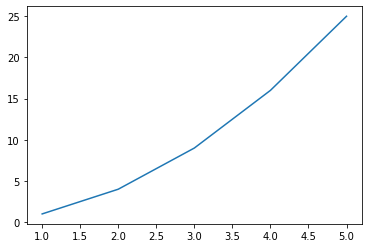

In [4]:
# x, yのリストを指定し描画
x = [1, 2, 3, 4, 5]
# y = [1, 4, 8, 16, 25]
y = np.array(x)**2
plt.plot(x, y)

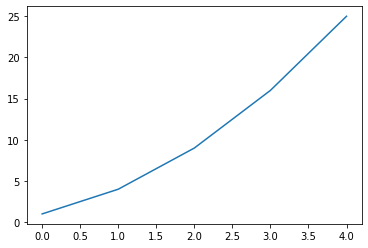

In [6]:
# xを省略すると，indexの0, 1, 2... がx軸(横軸)の値になる
plt.plot(y)

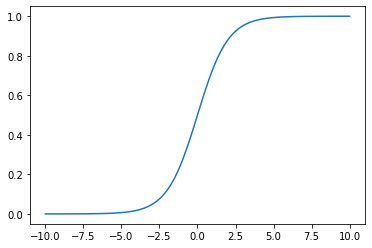

In [8]:
#　シグモイド関数
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
plt.plot(x, z)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Second argument 'b' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


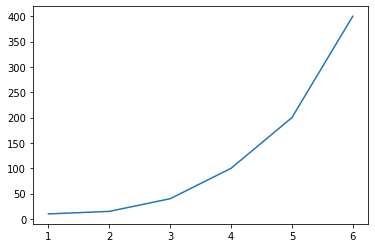

In [9]:
#DataFrameを使う
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
     'b': [10, 15, 40, 100, 200, 400]})
# 'b'はmatplotlibのパラメータで使える文字列なのでWarningがでる
plt.plot('a', 'b', data=df)

In [11]:
df

,a,b
0,1,10
1,2,15
2,3,40
3,4,100
4,5,200
5,6,400


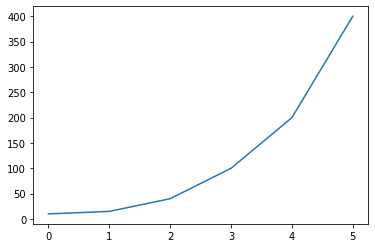

In [10]:
# Seriesを入れたら，indexがxの値になる
plt.plot(df['b'])

## 装飾

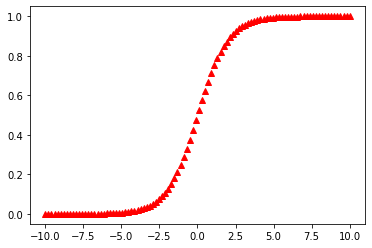

In [20]:
# color: b, r, g, y
# style: -, --, ^, *, o
# length: linewidth引数で指定
plt.plot(x, z, 'r^', linewidth=5)

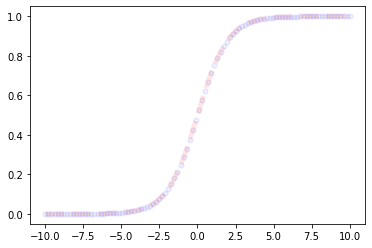

In [26]:
# color : グラフの線の色　⇨　’red’や’green’のように色の名前を指定します．’r’や’g’のように頭文字でもOKです．
# lw (line width) : 線の太さ　⇨　数字です．好みの大きさにしてください
# ls (line style) : 線の種類　⇨　’-‘や’--‘のように指定します．よく使うのはこの二つのどちらかです．
# marker : マーカーの種類　⇨　’o’や’x’ように指定します．マーカーの形が変わります．
# markersize : マーカーの大きさ　⇨　数字です．好みの大きさにしてください
# markerfacecolor : マーカーの色　⇨　’red’や’green’のように色の名前を指定します．’r’や’g’のように頭文字でもOKです．
# markeredgecolor : マーカーの枠に色　⇨　’red’や’green’のように色の名前を指定します．’r’や’g’のように頭文字でもOKです．
# markeredgewidth : マーカーの枠の太さ　⇨　数字です．好みの大きさにしてください
# alpha : plotの透明度　⇨　0から1の間をfloatで指定します．0に近い程透明度が上がります．
# 
plt.plot(x, z,
         color='red',
         lw=5, ls='--',
         marker='o',
         markersize=2,
         markerfacecolor='yellow',
         markeredgecolor='blue',
         markeredgewidth=4,
         alpha=0.1)

##  付属情報を付ける

([<matplotlib.axis.YTick at 0x7f80d6d17810>,
 <a list of 3 Text yticklabel objects>)

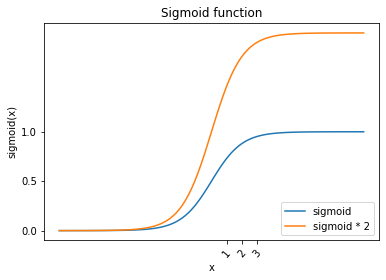

In [30]:
# plt.xlabel()でx軸にラベルをつける
# plt.ylabel()でy軸にラベルをつける
# plt.title()で図にタイトルをつける
# plt.plot(label=’ラベル’)でplotにラベルをつけ, plt.legend()で凡例をつける
# plt.xticks()でx軸に任意のticksをつける
# plt.yticks()でy軸に任意のticksをつける
# plt.axis(‘off’)で軸を消す
plt.plot(x, z, label='sigmoid')
# ２つのグラフを表示する場合はもう１つplt.plotを作ればOK
plt.plot(x, 2*z, label='sigmoid * 2')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid function')
plt.legend(loc=4)
plt.xticks([1, 2, 3], rotation=50)
plt.yticks([0, 0.5, 1])

In [36]:
# 年代別のrevenueの平均推移のグラフを描画
df = pd.read_csv('./datasets/tmdb_5000_movies.csv')
# yeah項目をrelease_dateから作成
df = df.dropna(subset=['release_date'])
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))

Text(0, 0.5, 'count')

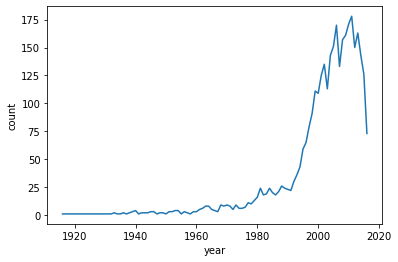

In [38]:
# レコード数の年代推移
df = df.sort_values('year')
plt.plot(df.groupby('year').count()['id'])
plt.xlabel('year')
plt.ylabel('count')

Text(0, 0.5, 'revenue')

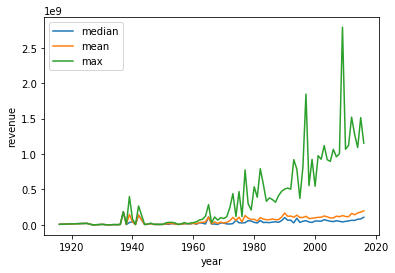

In [39]:
# revenueの年代の推移を見てみる
df = df[df['revenue']!=0]
plt.plot(df.groupby('year').median()['revenue'], label='median')
plt.plot(df.groupby('year').mean()['revenue'], label='mean')
plt.plot(df.groupby('year')['revenue'].max(), label='max')
plt.legend()
plt.xlabel('year')
plt.ylabel('revenue')

## 複数のグラフを描画する

### plt.subplot(nrows, ncols, index)

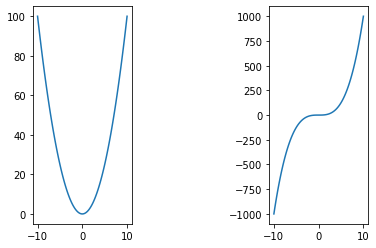

In [43]:
x = np.linspace(-10, 10, 100)

# 1(行) x 2(列)のplot.indexは1から始まる．
plt.subplot(1, 3, 1)
#plt.subplot(121) #この書き方も可能
plt.plot(x, x**2)


plt.subplot(1, 3, 3)
plt.plot(x, x**3)

### plt.figureオブジェクト

In [44]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

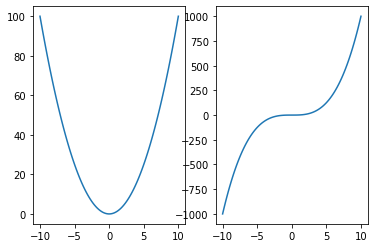

In [45]:
fig = plt.figure()
# subplotを足していくイメージ．axesオブジェクトを作っていく
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, x**2)
ax2.plot(x, x**3)

### fig, axes = plt.subplots(nrows=1, ncols=2)

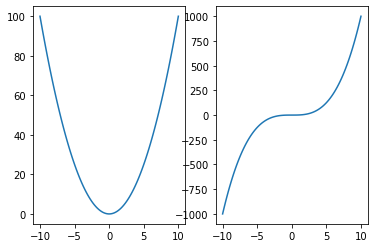

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

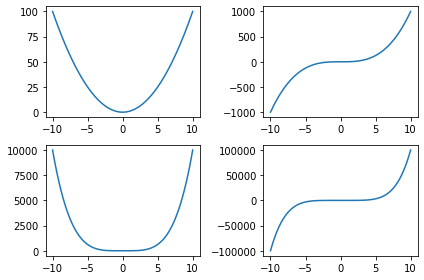

In [51]:
# 複数行列を作る場合
fig, axes = plt.subplots(nrows=2, ncols=2)
# [行, 列]でindexingする
axes[0, 0].plot(x, x**2)
axes[0, 1].plot(x, x**3)
axes[1, 0].plot(x, x**4)
axes[1, 1].plot(x, x**5)
# 軸のラベル等が被ってみにくい時は
fig.tight_layout()

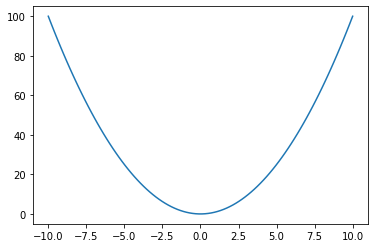

In [52]:
#１つの場合でも使える
fig, axes = plt.subplots() #デフォルトはnros=1, ncols=1
axes.plot(x, x**2)

### 付属情報(axes.set_xx())

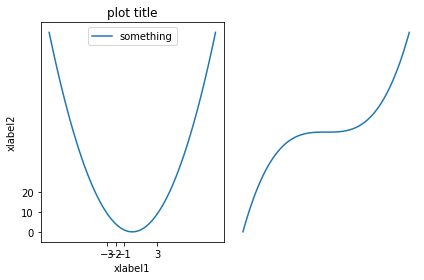

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, x**2, label='something')
axes[1].plot(x, x**3)
axes[0].set_xlabel('xlabel1')
axes[0].set_ylabel('xlabel2')
axes[0].set_title('plot title')
axes[0].set_xticks([-3, -2, -1, 3])
axes[0].set_yticks([0, 10, 20])
axes[0].legend()
axes[1].axis('off')
# fig.tight_layout()

## plt.scatter()

Text(0, 0.5, 'budget')

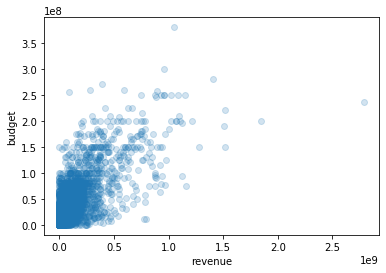

In [57]:
df = pd.read_csv('./datasets/tmdb_5000_movies.csv')
# revenueとbudgetの散布図
plt.scatter(df['revenue'], df['budget'], alpha=0.2)
# data引数を使ってもOK
# plt.scatter('revenue', 'budget', data=df, alpha=0.2)
plt.xlabel('revenue')
plt.ylabel('budget')

Text(0, 0.5, 'budget')

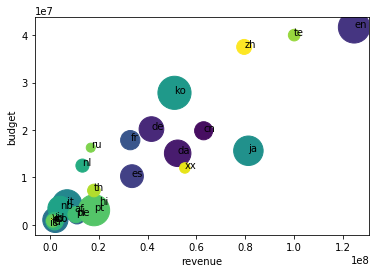

In [60]:
#マーカーのサイズに意味を持たせることも
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
lang_group_df = df.groupby('original_language').mean()[['revenue', 'budget', 'vote_count']]
c = np.arange(len(lang_group_df))
plt.scatter('revenue', 'budget',c=c, s='vote_count' ,data=lang_group_df)
# 各マーカーにtextをいれる
for idx, row in lang_group_df.iterrows():
    plt.annotate(idx, (row['revenue'], row['budget']))
plt.xlabel('revenue')
plt.ylabel('budget')

## plt.hist()

Text(0.5, 0, 'vote_average')

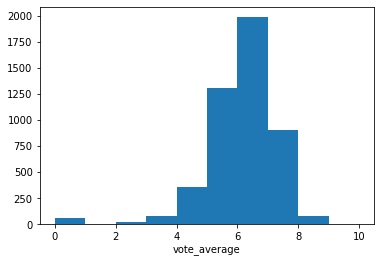

In [62]:
# 映画の評価スコアのヒストグラム
df = pd.read_csv('./datasets/tmdb_5000_movies.csv')
plt.hist(df['vote_average'], bins=10)
plt.xlabel('vote_average')

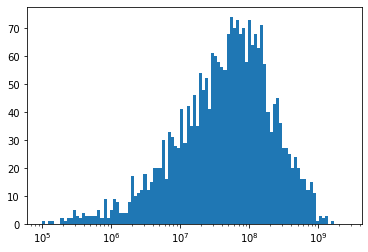

In [67]:
#profitのヒストグラム
fig, axes = plt.subplots()
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df['profit'] = df.apply(lambda row: row['revenue'] - row['budget'], axis=1)
#x軸をlogスケールにする
logbins = np.logspace(5,np.log10(df['profit'].max()),100)
axes.hist(df['profit'], bins=logbins)
axes.set_xscale('log')


## plt.bar()

  categorical  val
0           A   10
1           B   30
2           C   20


<BarContainer object of 3 artists>

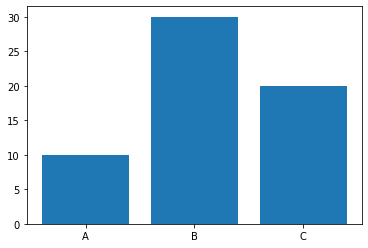

In [69]:
df = pd.DataFrame({'categorical':['A', 'B', 'C'], 'val':[10, 30, 20]})
print(df)
plt.bar('categorical', 'val', data=df)

## DataFrameのbuilt-in plot

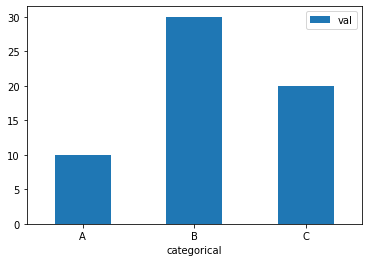

In [70]:
df.plot('categorical', 'val', kind='bar', rot=0)
# .plot.bar()でもOK
# df.plot.bar('lab', 'val', rot=0)

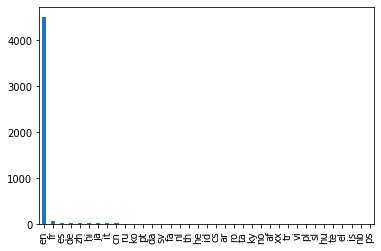

In [71]:
# Seriesにも使える．(value_counts())
df = pd.read_csv('./datasets/tmdb_5000_movies.csv')
df['original_language'].value_counts().plot(kind='bar')
plt.show()

## plt.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f80d49c4210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f80d49c4390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f80d565f190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f80d49b84d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f80d5bda710>],
 'means': []}

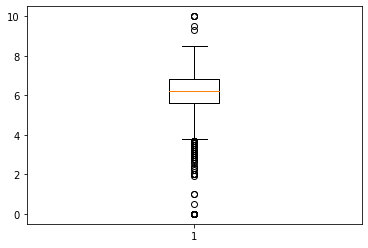

In [72]:
# 箱ひげ図 (boxplot)
plt.boxplot(df['vote_average'])

## figsize引数でplotのサイズを指定

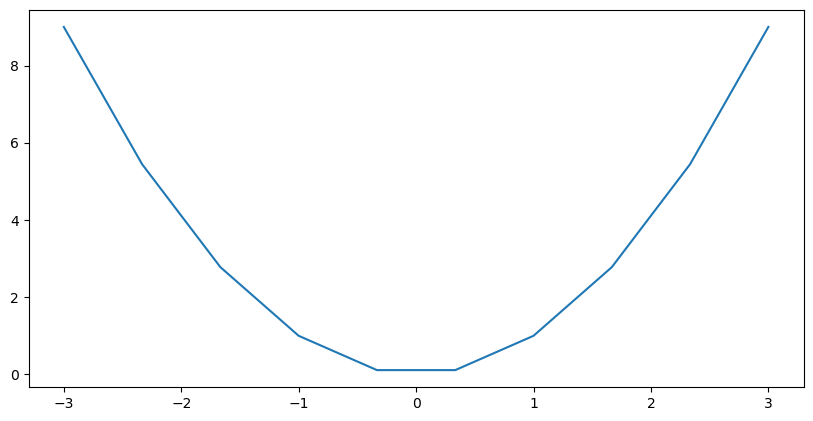

In [77]:
x = np.linspace(-3, 3, 10)
# figsize=(width, height)をinchスケールで,dpiでdots per inchを指定
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(x, x**2)

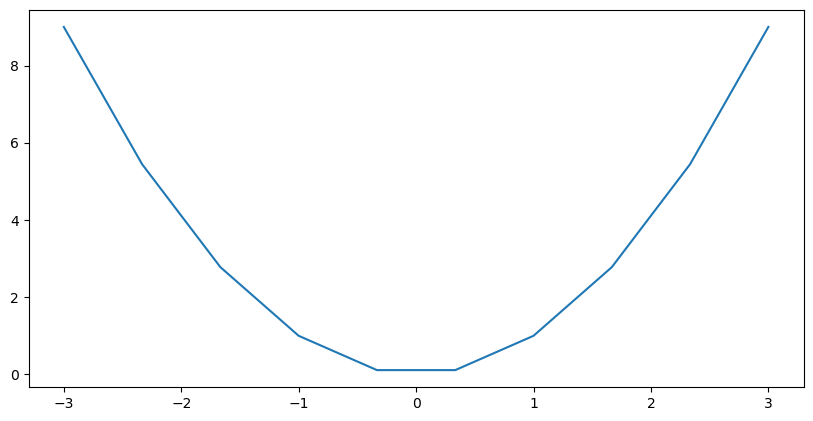

In [78]:
# オブジェクト指向ではsubplotsの引数に入れる
fig, axes = plt.subplots(figsize=(10, 5), dpi=100)
axes.plot(x, x**2)

## .savefig('パス')

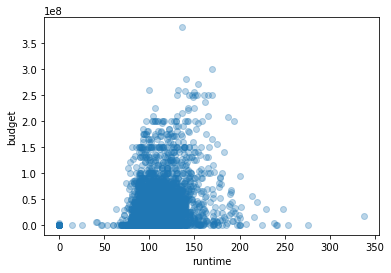

In [79]:
# png形式で保存
plt.scatter('runtime', 'budget', data=df, alpha=0.3)
plt.xlabel('runtime')
plt.ylabel('budget')
plt.savefig('./outputs/runtim_budget_scatter.png')

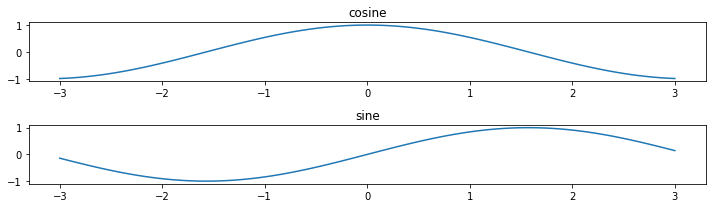

In [81]:
# オブジェクト指向ではfig.savefig('パス')
fig, axes = plt.subplots(2, 1, figsize=(10, 3))
x = np.linspace(-3, 3, 100)
# cosine
axes[0].set_title('cosine')
axes[0].plot(x, np.cos(x))
# sine
axes[1].set_title('sine')
axes[1].plot(x, np.sin(x))
fig.tight_layout()
fig.savefig('./outputs/cos_sin.png')

## PDFで保存する

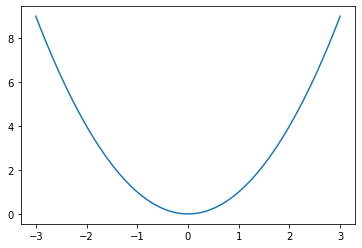

In [82]:
# PdfPagesをimport
from matplotlib.backends.backend_pdf import PdfPages
# pdfインスタンス作成
pdf = PdfPages('./outputs/pdf_file.pdf')
fig, axes = plt.subplots()
axes.plot(x, x**2)
pdf.savefig(fig)

pdf.close()

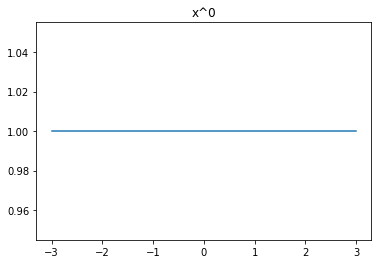

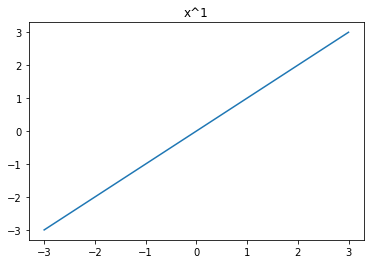

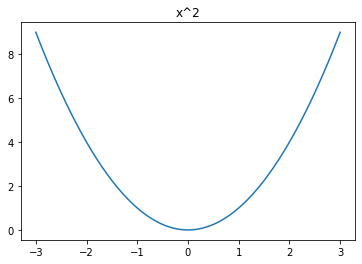

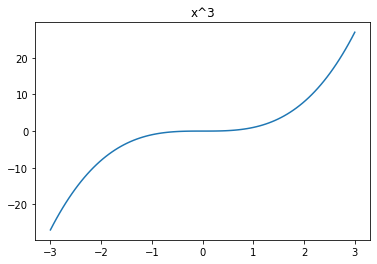

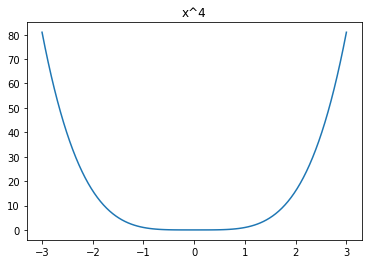

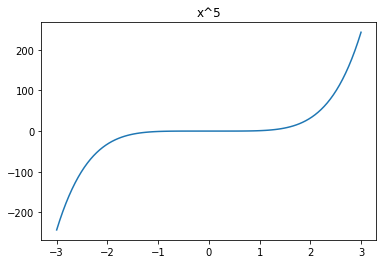

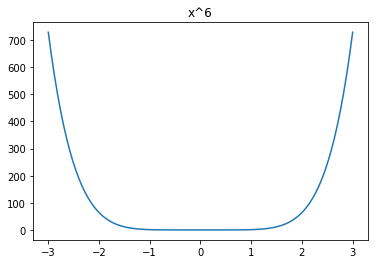

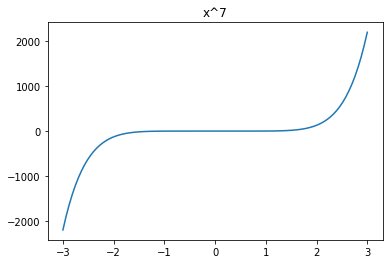

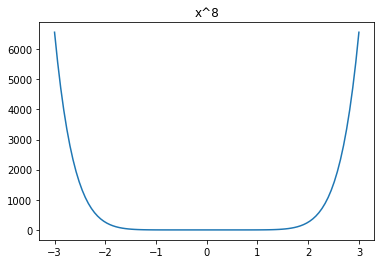

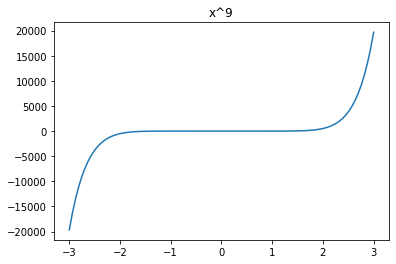

In [83]:
pdf = PdfPages('./outputs/savemultifig_sample.pdf')
for i in range(0, 10):
    #------グラフ作成--------
    fig, axes = plt.subplots()
    #グラフの形状が徐々にかわるように適当に設計
    axes.plot(x, x**i)
    #タイトル．pdfで文字検索が可能なので便利
    axes.set_title('x^{}'.format(i))
    #-----------------------
 
    #forループのなかで保存
    pdf.savefig(fig)
# close処理
pdf.close()
